In [74]:
# import packages
import csv
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import seaborn as sns
import cv2

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, MaxPooling2D 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping


In [30]:
labels = ['rugby', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label).replace("\\","/")
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [38]:
train = get_data('./data/train')
test = get_data('./data/test')

C:\Users\mama2\AppData\Local\Temp\ipykernel_9864\3408348889.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


c:\Users\mama2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

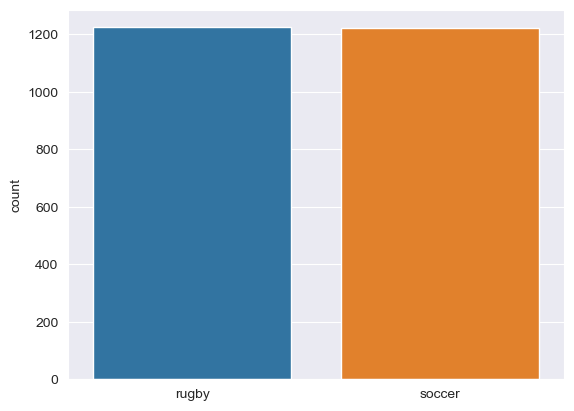

In [39]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("rugby")
    else :
        l.append("soccer")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'rugby')

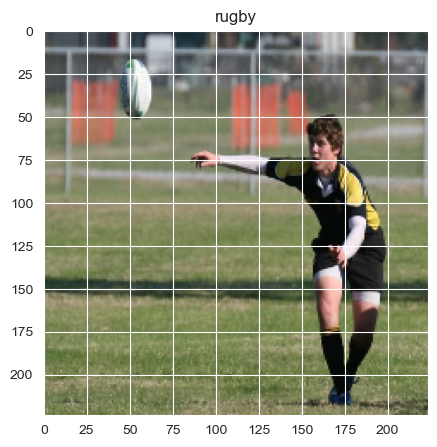

In [40]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'soccer')

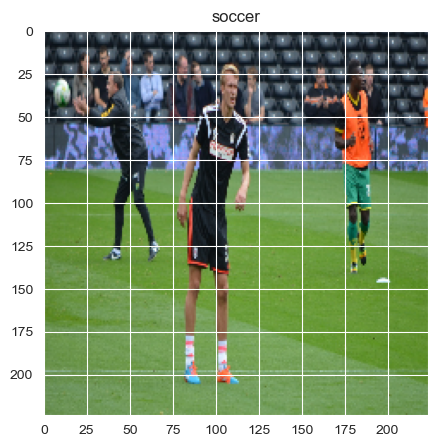

In [41]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [42]:
x_train = []
y_train = []
x_test = []
y_test= []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [43]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [71]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 28, 28, 64)      

In [59]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

#model.add(Conv2D(32, 3, padding="same", activation="relu"))
#model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 200704)           

In [75]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt, loss = SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [76]:
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min', patience = 2)
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test),callbacks=early_stop)

Epoch 1/100
77/77 [==============================] - 67s 865ms/step - loss: 0.6651 - accuracy: 0.6334 - val_loss: 0.6427 - val_accuracy: 0.7148
Epoch 2/100
77/77 [==============================] - 62s 803ms/step - loss: 0.6608 - accuracy: 0.6306 - val_loss: 0.6388 - val_accuracy: 0.7344
Epoch 3/100
77/77 [==============================] - 64s 837ms/step - loss: 0.6574 - accuracy: 0.6453 - val_loss: 0.6353 - val_accuracy: 0.7361
Epoch 4/100
77/77 [==============================] - 65s 836ms/step - loss: 0.6580 - accuracy: 0.6400 - val_loss: 0.6344 - val_accuracy: 0.7082
Epoch 5/100
77/77 [==============================] - 67s 866ms/step - loss: 0.6535 - accuracy: 0.6449 - val_loss: 0.6293 - val_accuracy: 0.7443
Epoch 6/100
77/77 [==============================] - 67s 877ms/step - loss: 0.6510 - accuracy: 0.6490 - val_loss: 0.6257 - val_accuracy: 0.7344
Epoch 7/100
77/77 [==============================] - 66s 853ms/step - loss: 0.6456 - accuracy: 0.6645 - val_loss: 0.6235 - val_accuracy:

KeyboardInterrupt: 

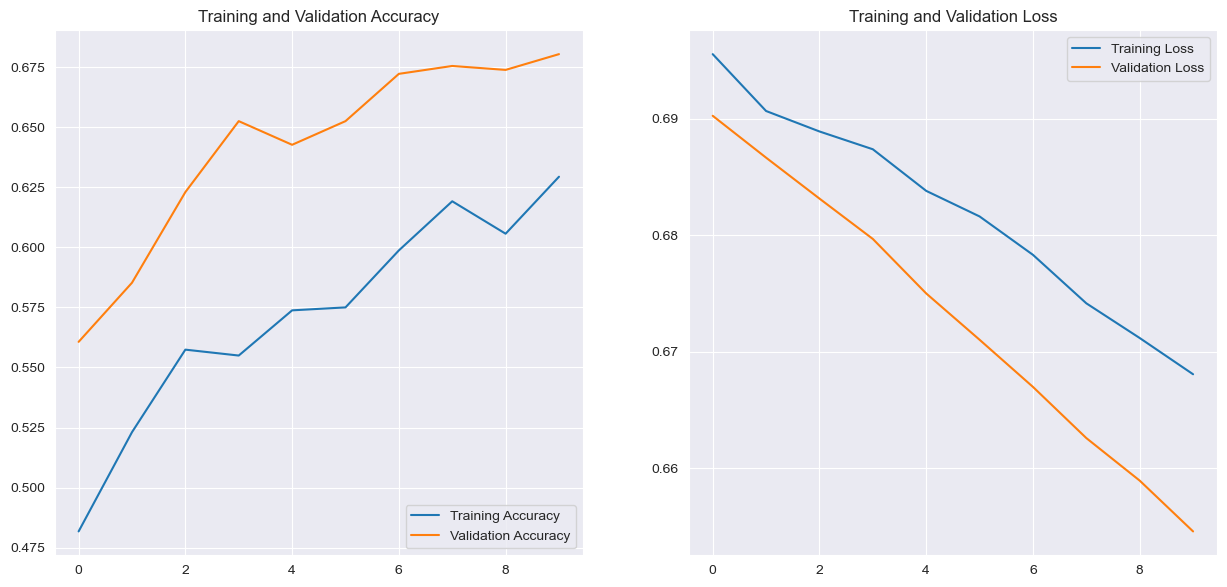

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_test, classes_x, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))

20/20 [==============================] - 3s 123ms/step
                  precision    recall  f1-score   support

 Rugby (Class 0)       0.68      0.67      0.68       305
Soccer (Class 1)       0.68      0.69      0.68       305

        accuracy                           0.68       610
       macro avg       0.68      0.68      0.68       610
    weighted avg       0.68      0.68      0.68       610



In [ ]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
    
image = load_img('fd.png', target_size=(224, 224))
plt.figure(figsize = (5,5))
plt.imshow(image)
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

predictions = model.predict(img)
score = tf.nn.softmax(predictions[0])
class_names = ["rugby","soccer"]

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)